# 数值微分

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

import utils
utils.use_svg()
sympy.init_printing()

# 取消科学计数法
np.set_printoptions(suppress=True)

## 问题

导数表示某个瞬间的变化量，它可以定义成下面的式子：

$$
{df(x) \over dx} = \lim_{h \to 0} {f(x + h) - f(x) \over h}
$$

但是实际计算中，不可能存在无穷小量，只能使用一个较小的值来表示这个无穷小，比如 $h = 10^{-5}$，但是这样会产生 **舍入误差(Rounding Error)**；

比如，求 $f(x) = e^x \sin x$ 在 $x = {1 \over 2}$ 处导数的近似值，我们还是先使用符号计算求出精确解；

In [2]:
x = sympy.Symbol("x")
fx = sympy.E ** x * sympy.sin(x)
FX = sympy.lambdify(x, fx, 'numpy')
fx

In [3]:
dfx = fx.diff()
DFX = sympy.lambdify(x, dfx, 'numpy')
dfx

In [4]:
r = dfx.subs({x: sympy.S(1) / 2})
nr = float(sympy.N(r, 15))
r, nr

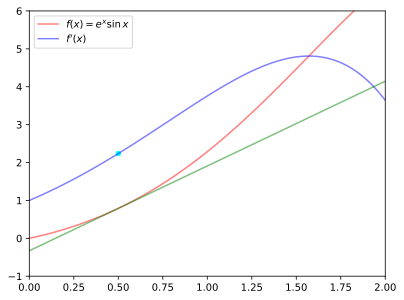

In [5]:
X = np.linspace(0, 3.2, 100)

ax = plt.figure().add_subplot()

ax.plot(X, FX(X), c='red', alpha=0.5, label='$f(x) = e^x \\sin x$')
ax.plot(X, DFX(X), c='blue', alpha=0.5, label="$f'(x)$")
ax.plot(X, sympy.lambdify(x, nr * (x - 0.5) + FX(0.5), 'numpy')(X), c='green', alpha=0.5)
ax.scatter([0.5], [nr], c='cyan', s=20)
ax.set_ylim((-1, 6))
ax.set_xlim((0, 2))
ax.legend()
plt.show()

## 一阶近似差分

由泰勒公式可得，两点 **前向差分** 公式：

$\displaystyle
f'(x) = {f(x + h) - f(x) \over h} - {h \over 2} f''(c)
$

这里 $c$ 在 $x$ 和 $x + h$ 之间；

于是我们可以认为：

$\displaystyle
f'(x) \approx {f(x + h) - f(x) \over h}
$

由于误差项是二阶导数，所以称之为一阶近似；

In [6]:
def DFX1(x, h=0.0001):
    return (FX(x + h) - FX(x)) / h


nr1 = DFX1(0.5)
nr1, nr, nr1 - nr

## 二阶近似差分

更高级的策略可以建立二阶公式，根据泰勒公式，如果 $f(x)$ 三次可微，则：

$
\begin{aligned}
f(x + h) &= f(x) + hf'(x) + {h^2 \over 2} f''(x) + {h^3 \over 6} f'''(c_1)\\
f(x - h) &= f(x) - hf'(x) + {h^2 \over 2} f''(x) - {h^3 \over 6} f'''(c_2)\\
\end{aligned}
$

这里 $x - h < c_2 < x < c_1 < x + h$，这两个式子相减得到，三点**中心差分**公式：

$\displaystyle
f'(x) = {f(x + h) - f(x - h) \over 2h} - {h^2 \over 6} f'''(c)
$

这里 $x - h < c < x + h$，由于误差项是三阶导数，所以这里称为二阶近似，理论上比一阶误差更小；


In [7]:
def DFX2(x, h=0.0001):
    return (FX(x + h) - FX(x - h)) / (2 * h)

nr2 = DFX2(0.5)
nr2, nr, nr2 - nr

显然极大地减小了误差，当然如果 $f(x)$ 四阶可微，那么我们可以构造出三阶近似差分，不过，感觉二阶误差已经足够小了；

## 舍入误差

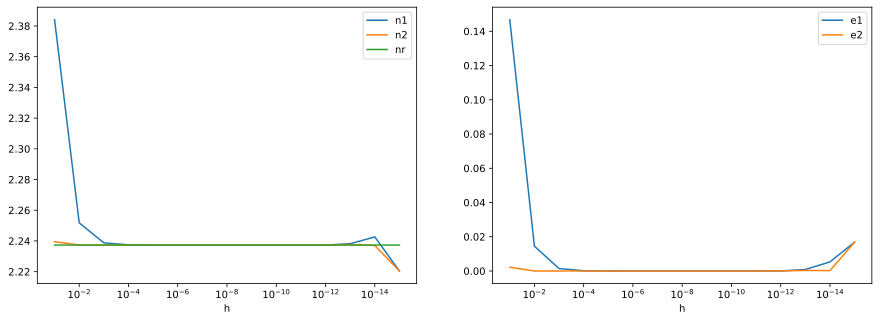

In [8]:
import pandas as pd

h = 0.1
p = 0.5
data = []
for i in range(15):
    n1 = DFX1(p, h)
    n2 = DFX2(p, h)
    data.append([h, n1, abs(n1 - nr), n2, abs(n2 - nr), nr])
    h /= 10

frame = pd.DataFrame(data, columns=["h", "n1", 'e1', 'n2', 'e2', 'nr'])
axes = plt.figure(figsize=(15, 5)).subplots(1, 2)
frame.plot(x='h', y=['n1', 'n2', 'nr'], logx=True, ax=axes[0]).invert_xaxis()
frame.plot(x='h', y=['e1', 'e2'], logx=True, ax=axes[1]).invert_xaxis()
plt.show()

开始的时候，当 $h$ 减小时误差减小，一阶差分公式和二阶差分公式，分别得到很接近预期的误差 $o(h)$ 和 $o(h^2)$；

但是，当 $h$ 再进一步减小时，近似式反而变坏了；

对于数值计算来说，我们应该尽可能避免很接近的数相减，但是数值微分是不可避免的；

## 参考

- 索尔. 数值分析[M/OL]. 吴兆金, 王国英, 范红军, 译. <a href="https://book.douban.com/press/2609">人民邮电出版社</a><span><span class="pl"> 译者</span>: <a class="" href="/search/%E5%90%B4%E5%85%86%E9%87%91">吴兆金</a> / <a class="" href="/search/%E7%8E%8B%E5%9B%BD%E8%8B%B1">王国英</a> / <a class="" href="/search/%E8%8C%83%E7%BA%A2%E5%86%9B">范红军</a> </span>, 2010. https://book.douban.com/subject/4188358/.
